# Lab Activity Week 6

**Homework** Anythin you do not complete in lab is your homework. Please provide a link to your github repository as your homework submission.

### Step 1: Aquiring data

- Collect data from your weather and air quality sensors together (in the same script) for 5 minutes, taking a reading every second. 
- Make the name of the file saving the data something that is unique each time data is recorded. 
   - **HINT:** You can include the time as part of the file name, for example.
- Upload your new data to your git repository on GitHub and update the version of your respository on your laptop

### Step 2: Acquiring outdoor data
- Restart your raspberry pi system, powering it with the supplied batteries, rather than the power adaptor.
- Add a time delay to the start of your data acquisition script (as an optional user input)
- Start your data aquisition to again collect data for 5 minutes, taking readings every second, but this time with an initial ~2 minute delay (so it should run for ~7 minutes total).
- Take the whole system outdoors and wait there for the 5 minutes of data acquisition to complete.
- At your stations, again push your new data to your git repository on GitHub

### Step 3: Plotting indoor data
- Create a new Jupyter notebook and load (using pandas, for example) the data you now have from your device.
- Plot each type of data as a frequency distribution (histogram) with appropriate binning - meaning the distribution shows a good level of detail but does not have binning artifacts
- Using the mean and standard deviation of each set of data, does any of the data you have recorded look like it is well described by a normal distribution?
  - Using the mean and standard deviation, try plotting a Gaussian function along with each of your frequency distributions and see how well they match.

In [25]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import io 
import requests
import scipy.stats as stats
from scipy.stats import norm
from math import sqrt

### Step 4: Comparing Indoor vs Outdoor data
- Produce the same plots as in Step 2 for your new outdoor data
- Now produce plots that compare indoors vs outdoors for each of your data types - don't forget labels
- Comment on your results
- Compare the mean and standard deviation values for each set of indoor data versus outdoor data, are they in agreement?
  - NOTE: The variance in your data is not the uncertainty on the mean (central limit theorem)
  - what is your mean uncertainty?
  - How many inside mean standard deviations (1 sigma uncertainty) are your inside and outside measurements separated by?
- If your distributions were not well described by a Gaussian, do you think you took enough data for the central limit theorem to apply?

Yes I believe I took enough data for the central limit theorem to apply. The minimum sample size for the central limit theorem is 30 and we have 252 data points. 

,PM 1.0,PM 2.5,PM 10,temperature,gas,pressure,altitude,relative humidity,time
0,0,0,0,23.872578,72935,1013.088403,1.345494,19.868757,1.676509e+09
1,0,0,0,23.895430,23578,1013.095333,1.287791,20.000450,1.676509e+09
2,0,0,0,23.940352,32194,1013.097314,1.271291,20.201533,1.676509e+09
3,0,0,0,23.983711,38003,1013.093131,1.306124,20.470968,1.676509e+09
4,0,0,0,24.023555,42512,1013.088280,1.346513,20.709339,1.676509e+09
...,...,...,...,...,...,...,...,...,...
247,0,0,0,32.902656,80507,1013.277624,-0.229985,44.525052,1.676509e+09
248,0,0,0,32.926289,82571,1013.277890,-0.232201,45.243828,1.676509e+09
249,0,0,0,32.902852,88880,1013.274384,-0.203010,43.270057,1.676509e+09
250,0,0,0,32.865547,95574,1013.269096,-0.158983,39.141544,1.676509e+09


,PM 1.0,PM 2.5,PM 10,temperature,gas,pressure,altitude,relative humidity,time
0,0,0,0,23.646797,146544,997.703910,130.243320,32.743965,1.677109e+09
1,0,0,0,23.678242,18415,997.696503,130.305766,31.455664,1.677109e+09
2,0,0,0,23.728828,29374,997.692829,130.336741,30.355163,1.677109e+09
3,0,1,1,23.784492,39396,997.688806,130.370655,29.353031,1.677109e+09
4,0,1,1,23.811250,48208,997.682365,130.424957,28.578308,1.677109e+09
...,...,...,...,...,...,...,...,...,...
247,0,0,1,23.563984,201978,997.098714,135.346722,16.458317,1.677109e+09
248,0,0,1,23.570625,203224,997.100977,135.327634,16.524416,1.677109e+09
249,0,0,0,23.577852,202599,997.104215,135.300324,16.565270,1.677109e+09
250,0,0,0,23.592500,202101,997.112772,135.228148,16.591319,1.677109e+09


Indoor Temperature Mean: 27.921141958085318
Outdoor Temperature Mean: 22.988868117559523
Indoor Temperature SD: 2.0885883624810098
Outdoor Temperature SD: 1.6094695477584227


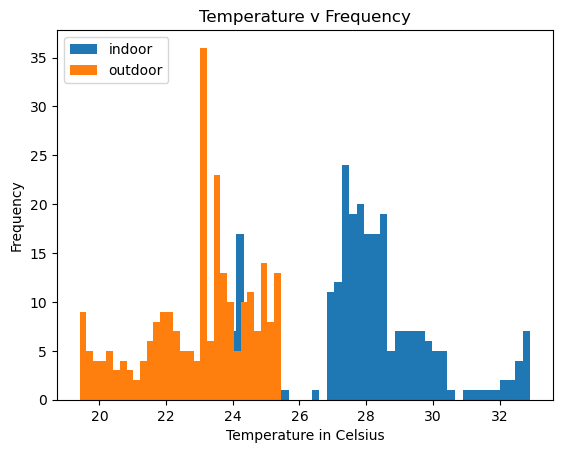

In [26]:
data_indoor =pd.read_csv("data.csv")
data_outdoor = pd.read_csv("outdoor_data.csv")
display(data_indoor)
display(data_outdoor)
nbins = 30
nbins1 = 40

plt.hist(data_indoor["temperature"], label = "indoor", bins = nbins1) 
plt.hist(data_outdoor["temperature"], label = "outdoor", bins = nbins)
plt.title("Temperature v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Temperature in Celsius")
plt.legend(loc ="upper left")
print("Indoor Temperature Mean: " + str(np.mean(data_indoor["temperature"])))
print("Outdoor Temperature Mean: " + str(np.mean(data_outdoor["temperature"])))

print("Indoor Temperature SD: " + str(np.std(data_indoor["temperature"])))
print("Outdoor Temperature SD: " + str(np.std(data_outdoor["temperature"])))
#This ended up here because I had combined the graphs before I graphed the plots individually. 


The indoor temperature mean is higher than the outdoor temperature mean because the indoors are warmed via a heating system. Thus the temperatures are higher inside by 5 degrees Celsius. Additionally the heating does not equally impact all parts of the building and the heating varies based on the location and the inside temperature is less consistent compared to the outside temperature thus explaining the higher sd indoors.This data seems to follow a general Gaussian curve to an extent. On the curve most all data falls within 3.84 standard deviations of the mean for outdoor data and within 4.3 standard deviations, and the mean uncertainty is 0.13 for indoor data and 0.101 for outdoor data.

Outdoor Temperature Mean: 22.988868117559523
Outdoor Temperature SD: 1.6094695477584227


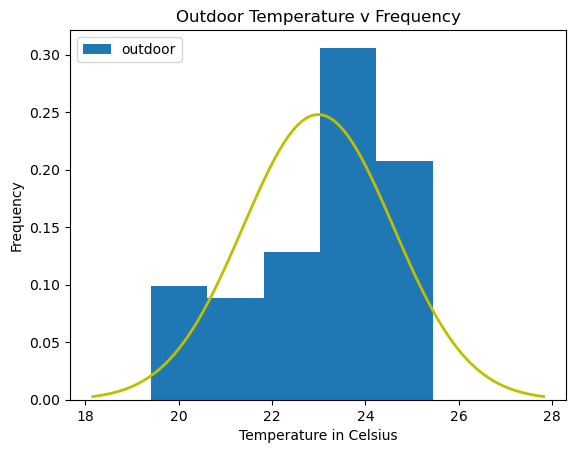

Indoor Temperature Mean: 27.921141958085318
Indoor Temperature SD: 2.0885883624810098


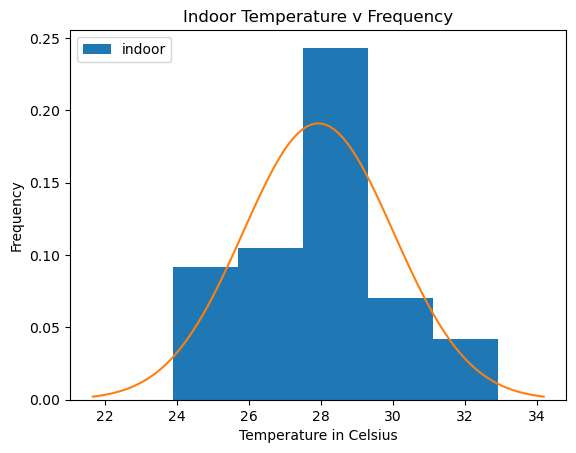

Mean Uncertainty for Indoor:0.13156869995972328
Mean Uncertainty for Outdoor:0.10138705157381858


In [27]:
print("Outdoor Temperature Mean: " + str(np.mean(data_outdoor["temperature"])))
print("Outdoor Temperature SD: " + str(np.std(data_outdoor["temperature"])))
plt.hist(data_outdoor["temperature"], label = "outdoor", density = True, bins = 5)
plt.title("Outdoor Temperature v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Temperature in Celsius")



mean = np.mean(data_outdoor["temperature"])
sd = np.std(data_outdoor["temperature"])
x = np.linspace(mean-3*np.std(data_outdoor["temperature"]),mean+3*np.std(data_outdoor["temperature"]),100)
y = norm.pdf(x, mean, sd)

plt.plot(x, y,'y-', linewidth = 2) 
plt.legend(loc ="upper left")
plt.show()  #This is not a gaussian distribution

plt.hist(data_indoor["temperature"], label = "indoor",density = True, bins = 5)
plt.title("Indoor Temperature v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Temperature in Celsius")
plt.legend(loc ="upper left")
print("Indoor Temperature Mean: " + str(np.mean(data_indoor["temperature"])))
print("Indoor Temperature SD: " + str(np.std(data_indoor["temperature"])))


mean1 = np.mean(data_indoor["temperature"])
sd1 = np.std(data_indoor["temperature"])
x = np.linspace(mean1-3*np.std(data_indoor["temperature"]),mean1+3*np.std(data_indoor["temperature"]),100)
plt.plot(x, stats.norm.pdf(x,mean1,sd1))
plt.show() #This is a gaussian distribution. 
uncertaintyindoor = sd1/sqrt(252)
uncertaintyoutdoor = sd/sqrt(252)
print("Mean Uncertainty for Indoor:" + str(uncertaintyindoor))

print("Mean Uncertainty for Outdoor:" + str(uncertaintyoutdoor))

Indoor Gas Mean: 92934.59126984127
Indoor Gas SD: 28820.89374026596


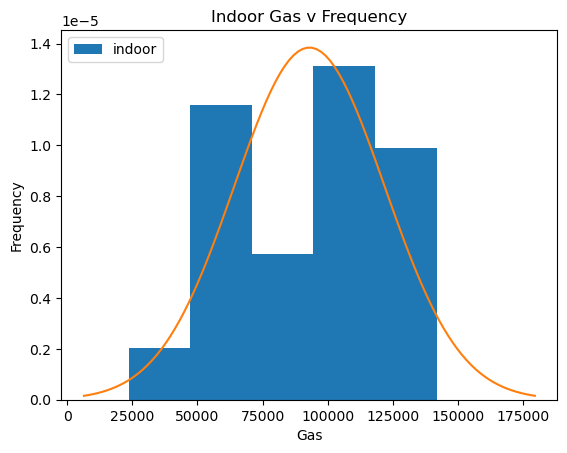

Outdoor Gas Mean: 166976.02777777778
Outdoor Gas SD: 36760.82047446136


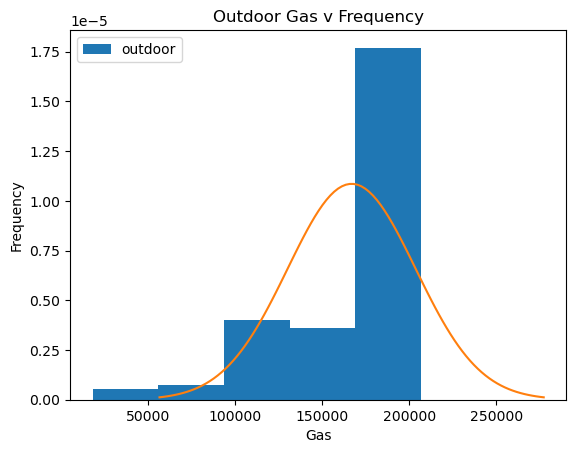

Mean Uncertainty for Indoor:2315.714023002766
Mean Uncertainty for Outdoor:2315.714023002766


In [28]:
plt.hist(data_indoor["gas"], label = "indoor",density = True, bins = 5)
plt.title("Indoor Gas v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Gas")
plt.legend(loc ="upper left")
print("Indoor Gas Mean: " + str(np.mean(data_indoor["gas"])))
print("Indoor Gas SD: " + str(np.std(data_indoor["gas"])))


mean = np.mean(data_indoor["gas"])
sd = np.std(data_indoor["gas"])
x = np.linspace(mean-3*np.std(data_indoor["gas"]),mean+3*np.std(data_indoor["gas"]),100)
plt.plot(x, stats.norm.pdf(x,mean,sd))
plt.show() #This is  not a gaussian distribution. 

plt.hist(data_outdoor["gas"], label = "outdoor",density = True, bins = 5)
plt.title("Outdoor Gas v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Gas")
plt.legend(loc ="upper left")
print("Outdoor Gas Mean: " + str(np.mean(data_outdoor["gas"])))
print("Outdoor Gas SD: " + str(np.std(data_outdoor["gas"])))


mean1 = np.mean(data_outdoor["gas"])
sd1 = np.std(data_outdoor["gas"])
x = np.linspace(mean1-3*np.std(data_outdoor["gas"]),mean1+3*np.std(data_outdoor["gas"]),100)
plt.plot(x, stats.norm.pdf(x,mean1,sd1))
plt.show() #This is not a gaussian distribution. 
uncertaintyindoor = sd1/sqrt(252)
uncertaintyoutdoor = sd1/sqrt(252)
print("Mean Uncertainty for Indoor:" + str(uncertaintyindoor))

print("Mean Uncertainty for Outdoor:" + str(uncertaintyoutdoor))


Outdoor Humidity Mean: 20.3245934554142
Outdoor Humidity SD: 4.089225335215773


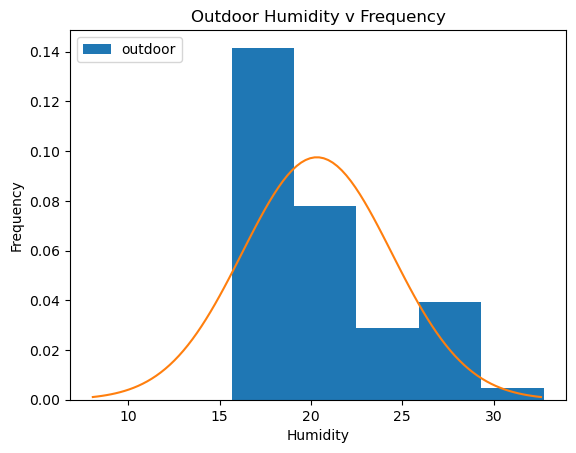

Indoor Humidity Mean: 30.51053262849725
Indoor Humidity SD: 17.71161136464671


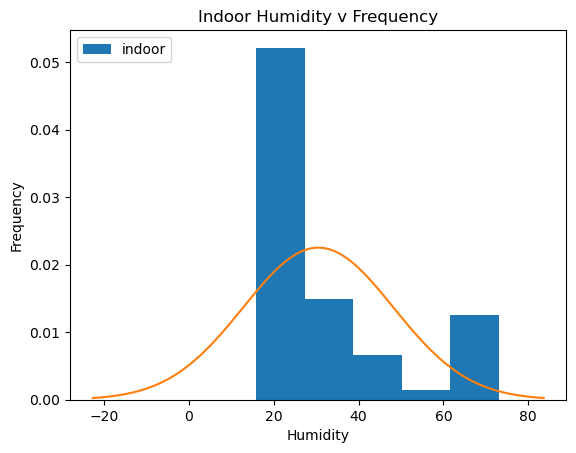

Mean Uncertainty for Indoor:1.1157266425971555
Mean Uncertainty for Outdoor:0.257596983140135


In [29]:
plt.hist(data_outdoor["relative humidity"], label = "outdoor",density = True, bins = 5)
plt.title("Outdoor Humidity v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Humidity")
plt.legend(loc ="upper left")
print("Outdoor Humidity Mean: " + str(np.mean(data_outdoor["relative humidity"])))
print("Outdoor Humidity SD: " + str(np.std(data_outdoor["relative humidity"])))


mean = np.mean(data_outdoor["relative humidity"])
sd = np.std(data_outdoor["relative humidity"])
x = np.linspace(mean-3*np.std(data_outdoor["relative humidity"]),mean+3*np.std(data_outdoor["relative humidity"]),100)
plt.plot(x, stats.norm.pdf(x,mean,sd))
plt.show() #This is not a gaussian distribution. 

plt.hist(data_indoor["relative humidity"], label = "indoor",density = True, bins = 5)
plt.title("Indoor Humidity v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Humidity")
plt.legend(loc ="upper left")
print("Indoor Humidity Mean: " + str(np.mean(data_indoor["relative humidity"])))
print("Indoor Humidity SD: " + str(np.std(data_indoor["relative humidity"])))


mean1 = np.mean(data_indoor["relative humidity"])
sd1 = np.std(data_indoor["relative humidity"])
x = np.linspace(mean1-3*np.std(data_indoor["relative humidity"]),mean1+3*np.std(data_indoor["relative humidity"]),100)
plt.plot(x, stats.norm.pdf(x,mean1,sd1))
plt.show() #This is not a gaussian distribution. 
uncertaintyindoor = sd1/sqrt(252)
uncertaintyoutdoor = sd/sqrt(252)
print("Mean Uncertainty for Indoor:" + str(uncertaintyindoor))

print("Mean Uncertainty for Outdoor:" + str(uncertaintyoutdoor))

Indoor Altitude Mean: 0.38687834611301214
Indoor Altitude SD: 0.6360674851494406


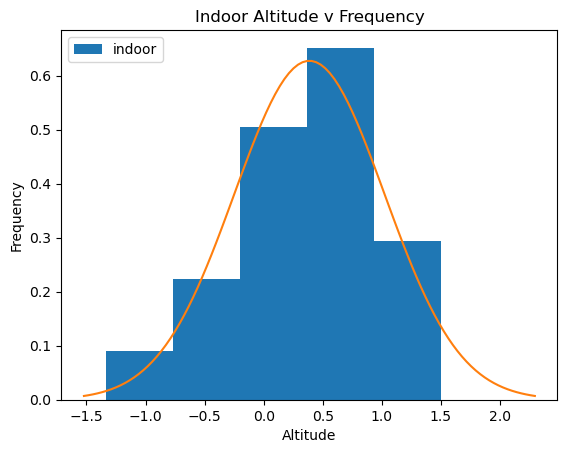

Outdoor Altitude Mean: 134.843902707148
Outdoor Altitude SD: 1.2503539243385913


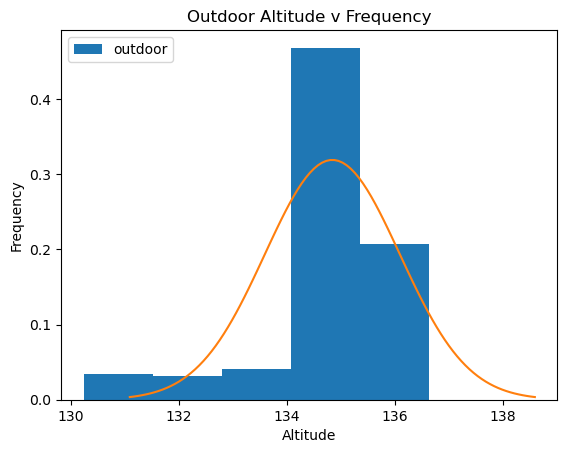

Mean Uncertainty for Indoor:0.04006848530380212
Mean Uncertainty for Outdoor:0.0787648936812758


In [30]:
nbins = 5
plt.hist(data_indoor["altitude"], label = "indoor",density = True, bins = nbins)
plt.title("Indoor Altitude v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Altitude")
plt.legend(loc ="upper left")
print("Indoor Altitude Mean: " + str(np.mean(data_indoor["altitude"])))
print("Indoor Altitude SD: " + str(np.std(data_indoor["altitude"])))


mean1 = np.mean(data_indoor["altitude"])
sd1 = np.std(data_indoor["altitude"])
x = np.linspace(mean1-3*np.std(data_indoor["altitude"]),mean1+3*np.std(data_indoor["altitude"]),100)
plt.plot(x, stats.norm.pdf(x,mean1,sd1))
plt.show() #This is not a gaussian distribution. 

nbins = 5
plt.hist(data_outdoor["altitude"], label = "outdoor",density = True, bins = nbins)
plt.title("Outdoor Altitude v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Altitude")
plt.legend(loc ="upper left")
print("Outdoor Altitude Mean: " + str(np.mean(data_outdoor["altitude"])))
print("Outdoor Altitude SD: " + str(np.std(data_outdoor["altitude"])))


mean = np.mean(data_outdoor["altitude"])
sd = np.std(data_outdoor["altitude"])
x = np.linspace(mean-3*np.std(data_outdoor["altitude"]),mean+3*np.std(data_outdoor["altitude"]),100)
plt.plot(x, stats.norm.pdf(x,mean,sd))
plt.show() #This is not a gaussian distribution. 

uncertaintyindoor = sd1/sqrt(252)
uncertaintyoutdoor = sd/sqrt(252)
print("Mean Uncertainty for Indoor:" + str(uncertaintyindoor))

print("Mean Uncertainty for Outdoor:" + str(uncertaintyoutdoor))

Outdoor Pressure Mean: 997.1583373644827
Outdoor Pressure SD: 0.14826204412194002


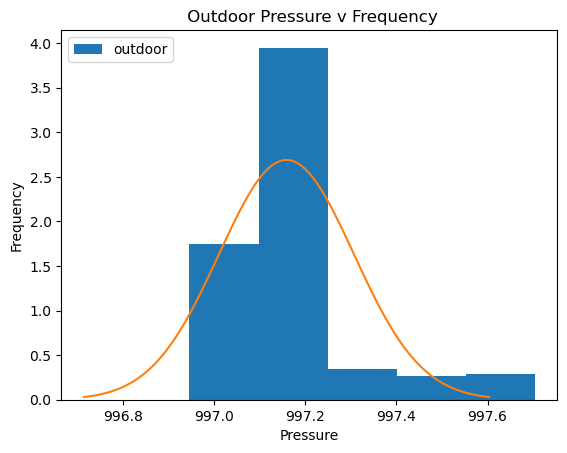

Indoor Pressure Mean: 1013.2035351375572
Indoor Pressure SD: 0.07639603356211891


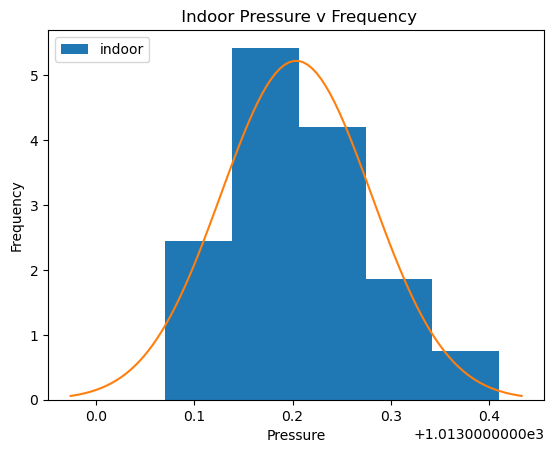

Mean Uncertainty for Indoor:0.004812497760883585
Mean Uncertainty for Outdoor:0.009339630895636643


In [31]:
nbins = 5
plt.hist(data_outdoor["pressure"], label = "outdoor",density = True, bins = nbins)
plt.title(" Outdoor Pressure v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Pressure")
plt.legend(loc ="upper left")
print("Outdoor Pressure Mean: " + str(np.mean(data_outdoor["pressure"])))
print("Outdoor Pressure SD: " + str(np.std(data_outdoor["pressure"])))


mean = np.mean(data_outdoor["pressure"])
sd = np.std(data_outdoor["pressure"])
x = np.linspace(mean-3*np.std(data_outdoor["pressure"]),mean+3*np.std(data_outdoor["pressure"]),100)
plt.plot(x, stats.norm.pdf(x,mean,sd))
plt.show()  #This is not a Gaussian Distribution

nbins = 5
plt.hist(data_indoor["pressure"], label = "indoor",density = True, bins = nbins)
plt.title(" Indoor Pressure v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Pressure")
plt.legend(loc ="upper left")
print("Indoor Pressure Mean: " + str(np.mean(data_indoor["pressure"])))
print("Indoor Pressure SD: " + str(np.std(data_indoor["pressure"])))


mean1 = np.mean(data_indoor["pressure"])
sd1 = np.std(data_indoor["pressure"])
x = np.linspace(mean1-3*np.std(data_indoor["pressure"]),mean1+3*np.std(data_indoor["pressure"]),100)
plt.plot(x, stats.norm.pdf(x,mean1,sd1))
plt.show() 

uncertaintyindoor = sd1/sqrt(252)
uncertaintyoutdoor = sd/sqrt(252)
print("Mean Uncertainty for Indoor:" + str(uncertaintyindoor))

print("Mean Uncertainty for Outdoor:" + str(uncertaintyoutdoor))
#This is not a gaussian distribution

Outdoor PM10 Mean: 1.3650793650793651
Outdoor PM10 SD: 1.099084572934717


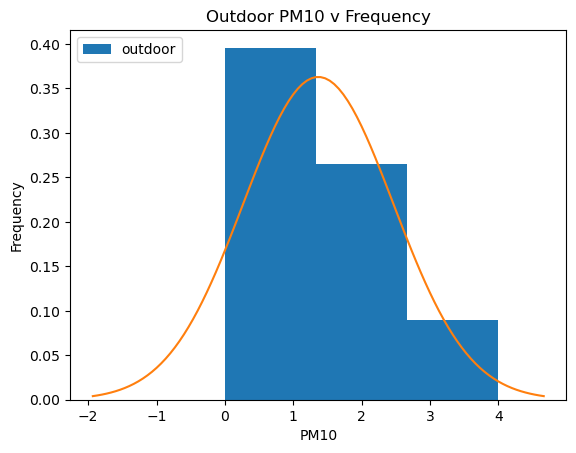

Mean Uncertainty for Outdoor:0.0692358202336403


In [32]:
nbins = 3
plt.hist(data_outdoor["PM 10"], label = "outdoor",density = True, bins = nbins)
plt.title("Outdoor PM10 v Frequency")
plt.ylabel("Frequency")
plt.xlabel("PM10")
plt.legend(loc ="upper left")
print("Outdoor PM10 Mean: " + str(np.mean(data_outdoor["PM 10"])))
print("Outdoor PM10 SD: " + str(np.std(data_outdoor["PM 10"])))


mean = np.mean(data_outdoor["PM 10"])
sd = np.std(data_outdoor["PM 10"])
x = np.linspace(mean-3*np.std(data_outdoor["PM 10"]),mean+3*np.std(data_outdoor["PM 10"]),100)
plt.plot(x, stats.norm.pdf(x,mean,sd))
plt.show()  #This is not a gaussian distribution.

uncertaintyoutdoor = sd/sqrt(252)


print("Mean Uncertainty for Outdoor:" + str(uncertaintyoutdoor))

Outdoor PM1.0 Mean: 0.09126984126984126
Outdoor PM1.0 SD: 0.3826639790161636


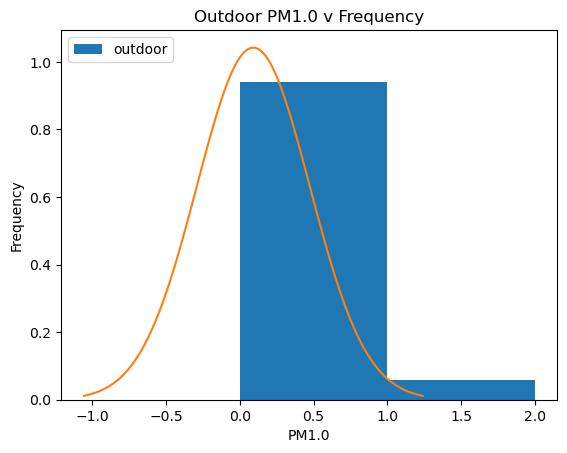

Mean Uncertainty for Outdoor:0.0692358202336403


In [33]:
nbins = 2
plt.hist(data_outdoor["PM 1.0"], label = "outdoor",density = True, bins = nbins)
plt.title("Outdoor PM1.0 v Frequency")
plt.ylabel("Frequency")
plt.xlabel("PM1.0")
plt.legend(loc ="upper left")
print("Outdoor PM1.0 Mean: " + str(np.mean(data_outdoor["PM 1.0"])))
print("Outdoor PM1.0 SD: " + str(np.std(data_outdoor["PM 1.0"])))


mean = np.mean(data_outdoor["PM 1.0"])
sd = np.std(data_outdoor["PM 1.0"])
x = np.linspace(mean-3*np.std(data_outdoor["PM 1.0"]),mean+3*np.std(data_outdoor["PM 1.0"]),100)
plt.plot(x, stats.norm.pdf(x,mean,sd))
plt.show()   #This is not a gaussian distribution
print("Mean Uncertainty for Outdoor:" + str(uncertaintyoutdoor))

Outdoor PM2.5 Mean: 0.746031746031746
Outdoor PM2.5 SD: 0.9123187616188287


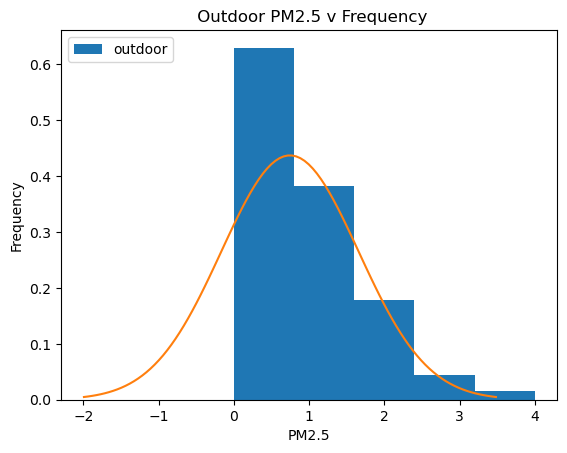

Mean Uncertainty for Outdoor:0.0692358202336403


In [34]:
nbins = 5
plt.hist(data_outdoor["PM 2.5"], label = "outdoor",density = True, bins = nbins)
plt.title(" Outdoor PM2.5 v Frequency")
plt.ylabel("Frequency")
plt.xlabel("PM2.5")
plt.legend(loc ="upper left")
print("Outdoor PM2.5 Mean: " + str(np.mean(data_outdoor["PM 2.5"])))
print("Outdoor PM2.5 SD: " + str(np.std(data_outdoor["PM 2.5"])))


mean = np.mean(data_outdoor["PM 2.5"])
sd = np.std(data_outdoor["PM 2.5"])
x = np.linspace(mean-3*np.std(data_outdoor["PM 2.5"]),mean+3*np.std(data_outdoor["PM 2.5"]),100)
plt.plot(x, stats.norm.pdf(x,mean,sd))
plt.show()  #This is not a gaussian distribution
print("Mean Uncertainty for Outdoor:" + str(uncertaintyoutdoor))

The indoor temperature mean is higher than the outdoor temperature mean because the indoors are warmed via a heating system. Thus the temperatures are higher inside by 5 degrees Celsius. Additionally the heating does not equally impact all parts of the building and the heating varies based on the location and the inside temperature is less consistent compared to the outside temperature thus explaining the higher sd indoors.

Indoor Gas Mean: 92934.59126984127
Outdoor Gas Mean: 166976.02777777778
Indoor Gas SD: 28820.89374026596
Outdoor Gas SD: 36760.82047446136


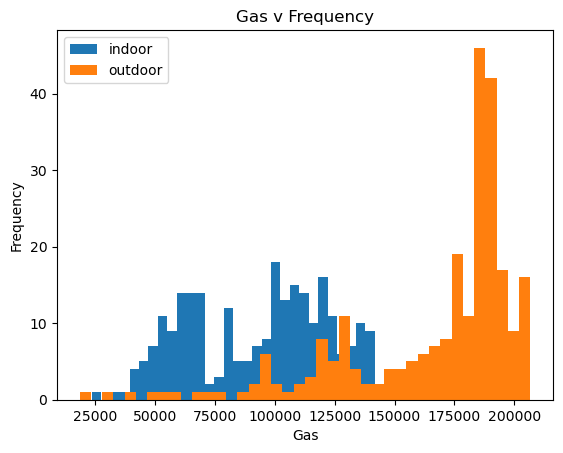

In [35]:
nbins = 30
nbins1 = 40
plt.hist(data_indoor["gas"], label = "indoor", bins = nbins) 
plt.hist(data_outdoor["gas"], label = "outdoor", bins = nbins1)
plt.title("Gas v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Gas")
plt.legend(loc ="upper left")
print("Indoor Gas Mean: " + str(np.mean(data_indoor["gas"])))
print("Outdoor Gas Mean: " + str(np.mean(data_outdoor["gas"])))

print("Indoor Gas SD: " + str(np.std(data_indoor["gas"])))
print("Outdoor Gas SD: " + str(np.std(data_outdoor["gas"]))) 


The Indoor Gas mean is significantly lesser than the outdoor gas mean and the indoor gas SD is lesser than the Outdoor Gas Sd. This makes sense because in the outdoors, the sensor will be exposed to a higher quantity of gas due to the exhaust from cars, the greater presence of air, etc.. It would also have a higher standard deviation because depending on where you are outdoors the gas present would vary whereas indoors, the amount of gas is more regulated. If you are near the building, you would have less concentration of gas than if you were near the road. Also if you are moving the sensor from one place to another, the frequency of gas detected by the sensor would also fluctuate. Hence the higher sd for the outdoor gas.  The indoor data seems to follow a general Gaussian curve to an extent. On the curve most all data falls within 1.6 standard deviations of the mean for outdoor data and within 3 standard deviations, and the mean uncertainty is 1,815 for indoor data and 2,315 for outdoor data.

Indoor Humidity Mean: 30.51053262849725
Outdoor Humidity Mean: 20.3245934554142
Indoor Humidity SD: 17.71161136464671
Outdoor Humidity SD: 4.089225335215773


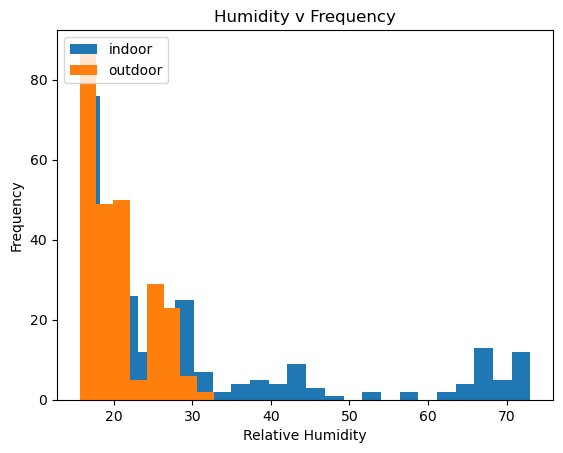

In [36]:
nbins = 8
nbins1 = 24
plt.hist(data_indoor["relative humidity"], label = "indoor", bins = nbins1) 
plt.hist(data_outdoor["relative humidity"], label = "outdoor", bins = nbins)
plt.title("Humidity v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Relative Humidity")
plt.legend(loc ="upper left")
print("Indoor Humidity Mean: " + str(np.mean(data_indoor["relative humidity"])))
print("Outdoor Humidity Mean: " + str(np.mean(data_outdoor["relative humidity"])))

print("Indoor Humidity SD: " + str(np.std(data_indoor["relative humidity"])))
print("Outdoor Humidity SD: " + str(np.std(data_outdoor["relative humidity"])))

For humidity, the indoor mean and the standard deviation is greater than the outdoor mean and the outdoor standard deviation because the indoor temperature is regulated in a way that would increase the room temperature. This happens because the outside is colder and thus less humid. And with higher temperatures come higher relative humidity so thus there would be a higher relative humidity mean indoors than outdoors. Additionally, it is possible that the air circulation is not consistently regulated throughout the building and thus some areas may be more humid than others. This may be the reason why there is a higher SD. On the curve most all data falls within 3.84 standard deviations of the mean for outdoor data and within 4.3 standard deviations, and the mean uncertainty is 1.115 for indoor data and 0.257 for outdoor data.

,PM 1.0,PM 2.5,PM 10,temperature,gas,pressure,altitude,relative humidity,time
0,0,0,0,23.872578,72935,1013.088403,1.345494,19.868757,1.676509e+09
1,0,0,0,23.895430,23578,1013.095333,1.287791,20.000450,1.676509e+09
2,0,0,0,23.940352,32194,1013.097314,1.271291,20.201533,1.676509e+09
3,0,0,0,23.983711,38003,1013.093131,1.306124,20.470968,1.676509e+09
4,0,0,0,24.023555,42512,1013.088280,1.346513,20.709339,1.676509e+09
...,...,...,...,...,...,...,...,...,...
247,0,0,0,32.902656,80507,1013.277624,-0.229985,44.525052,1.676509e+09
248,0,0,0,32.926289,82571,1013.277890,-0.232201,45.243828,1.676509e+09
249,0,0,0,32.902852,88880,1013.274384,-0.203010,43.270057,1.676509e+09
250,0,0,0,32.865547,95574,1013.269096,-0.158983,39.141544,1.676509e+09


,PM 1.0,PM 2.5,PM 10,temperature,gas,pressure,altitude,relative humidity,time
0,0,0,0,23.646797,146544,997.703910,130.243320,32.743965,1.677109e+09
1,0,0,0,23.678242,18415,997.696503,130.305766,31.455664,1.677109e+09
2,0,0,0,23.728828,29374,997.692829,130.336741,30.355163,1.677109e+09
3,0,1,1,23.784492,39396,997.688806,130.370655,29.353031,1.677109e+09
4,0,1,1,23.811250,48208,997.682365,130.424957,28.578308,1.677109e+09
...,...,...,...,...,...,...,...,...,...
247,0,0,1,23.563984,201978,997.098714,135.346722,16.458317,1.677109e+09
248,0,0,1,23.570625,203224,997.100977,135.327634,16.524416,1.677109e+09
249,0,0,0,23.577852,202599,997.104215,135.300324,16.565270,1.677109e+09
250,0,0,0,23.592500,202101,997.112772,135.228148,16.591319,1.677109e+09


Indoor Pressure Mean: 1013.2035351375572
Outdoor Pressure Mean: 997.1583373644827
Indoor Pressure SD: 0.07639603356211891
Outdoor Pressure SD: 0.14826204412194002


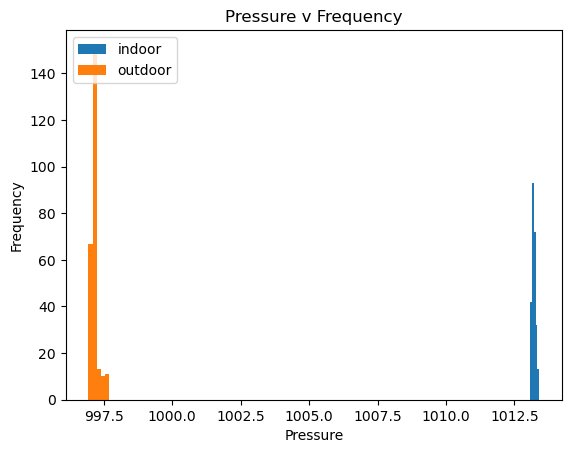

In [37]:
data_indoor =pd.read_csv("data.csv")
data_outdoor = pd.read_csv("outdoor_data.csv")
display(data_indoor)
display(data_outdoor)
nbins = 5
plt.hist(data_indoor["pressure"], label = "indoor", bins = nbins) 
plt.hist(data_outdoor["pressure"], label = "outdoor", bins = nbins)
plt.title("Pressure v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Pressure")
plt.legend(loc ="upper left")
print("Indoor Pressure Mean: " + str(np.mean(data_indoor["pressure"])))
print("Outdoor Pressure Mean: " + str(np.mean(data_outdoor["pressure"])))

print("Indoor Pressure SD: " + str(np.std(data_indoor["pressure"])))
print("Outdoor Pressure SD: " + str(np.std(data_outdoor["pressure"])))

The main reason why the pressure graphs for both the indoors and the outdoors is far apart is because I walked up the slope in order to collect the data and thus it showed very different results with a vast separation and pressure decreases as the altitude increases. Thus explaining the massive separation. On the curve most all data falls within 1.8 standard deviations of the mean for outdoor data and within 4.4 standard deviations, and the mean uncertainty is  for indoor data and  for outdoor data. On the curve most all data falls within 1.8 standard deviations of the mean for outdoor data and within 4.4 standard deviations, and the mean uncertainty is 0.0048 for indoor data and 0.009 for outdoor data.

,PM 1.0,PM 2.5,PM 10,temperature,gas,pressure,altitude,relative humidity,time
0,0,0,0,23.872578,72935,1013.088403,1.345494,19.868757,1.676509e+09
1,0,0,0,23.895430,23578,1013.095333,1.287791,20.000450,1.676509e+09
2,0,0,0,23.940352,32194,1013.097314,1.271291,20.201533,1.676509e+09
3,0,0,0,23.983711,38003,1013.093131,1.306124,20.470968,1.676509e+09
4,0,0,0,24.023555,42512,1013.088280,1.346513,20.709339,1.676509e+09
...,...,...,...,...,...,...,...,...,...
247,0,0,0,32.902656,80507,1013.277624,-0.229985,44.525052,1.676509e+09
248,0,0,0,32.926289,82571,1013.277890,-0.232201,45.243828,1.676509e+09
249,0,0,0,32.902852,88880,1013.274384,-0.203010,43.270057,1.676509e+09
250,0,0,0,32.865547,95574,1013.269096,-0.158983,39.141544,1.676509e+09


,PM 1.0,PM 2.5,PM 10,temperature,gas,pressure,altitude,relative humidity,time
0,0,0,0,23.646797,146544,997.703910,130.243320,32.743965,1.677109e+09
1,0,0,0,23.678242,18415,997.696503,130.305766,31.455664,1.677109e+09
2,0,0,0,23.728828,29374,997.692829,130.336741,30.355163,1.677109e+09
3,0,1,1,23.784492,39396,997.688806,130.370655,29.353031,1.677109e+09
4,0,1,1,23.811250,48208,997.682365,130.424957,28.578308,1.677109e+09
...,...,...,...,...,...,...,...,...,...
247,0,0,1,23.563984,201978,997.098714,135.346722,16.458317,1.677109e+09
248,0,0,1,23.570625,203224,997.100977,135.327634,16.524416,1.677109e+09
249,0,0,0,23.577852,202599,997.104215,135.300324,16.565270,1.677109e+09
250,0,0,0,23.592500,202101,997.112772,135.228148,16.591319,1.677109e+09


Indoor Altitude Mean: 0.38687834611301214
Outdoor Altitude Mean: 134.843902707148
Indoor Altitude SD: 0.6360674851494406
Outdoor Altitude SD: 1.2503539243385913


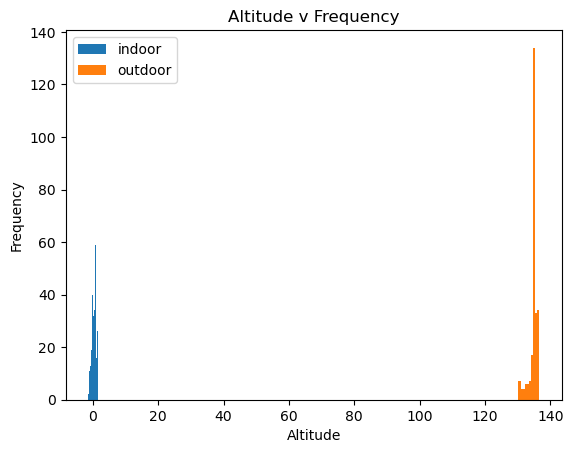

In [38]:
data_indoor =pd.read_csv("data.csv")
data_outdoor = pd.read_csv("outdoor_data.csv")
display(data_indoor)
display(data_outdoor)
nbins = 10
plt.hist(data_indoor["altitude"], label = "indoor", bins = nbins) 
plt.hist(data_outdoor["altitude"], label = "outdoor", bins = nbins)
plt.title("Altitude v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Altitude")
plt.legend(loc ="upper left")
print("Indoor Altitude Mean: " + str(np.mean(data_indoor["altitude"])))
print("Outdoor Altitude Mean: " + str(np.mean(data_outdoor["altitude"])))

print("Indoor Altitude SD: " + str(np.std(data_indoor["altitude"])))
print("Outdoor Altitude SD: " + str(np.std(data_outdoor["altitude"])))

The main reason why the pressure graphs for both the indoors and the outdoors is far apart is because I walked up the slope in order to collect the data and thus it showed very different results with a vast separation and pressure decreases as the altitude increases. Thus explaining the massive separation. On the curve most all data falls within 1.85 standard deviations of the mean for outdoor data and within 2.2 standard deviations, and the mean uncertainty is 0.04for indoor data and 0.078 for outdoor data.

Indoor PM1.0 Mean: 0.0
Outdoor PM1.0 Mean: 0.09126984126984126
Indoor PM1.0 SD: 0.0
Outdoor PM1.0 SD: 0.3826639790161636


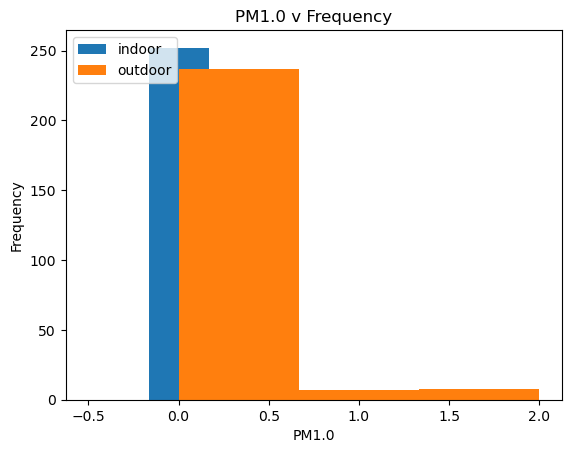

In [39]:


nbins = 3
plt.hist(data_indoor["PM 1.0"], label = "indoor", bins = nbins) 
plt.hist(data_outdoor["PM 1.0"], label = "outdoor", bins = nbins)
plt.title("PM1.0 v Frequency")
plt.ylabel("Frequency")
plt.xlabel("PM1.0")
plt.legend(loc ="upper left")
print("Indoor PM1.0 Mean: " + str(np.mean(data_indoor["PM 1.0"])))
print("Outdoor PM1.0 Mean: " + str(np.mean(data_outdoor["PM 1.0"])))

print("Indoor PM1.0 SD: " + str(np.std(data_indoor["PM 1.0"])))
print("Outdoor PM1.0 SD: " + str(np.std(data_outdoor["PM 1.0"])))

The outdoors will have a higher particulate matter and a higher standard deviation for it because the air is not regulated like it is indoors and hence the PM varies based on where outside you place the sensor. Additionally it is also more exposed to particulate because the sensor would be near driving cars which would emit particulate matter.The outdoors will have a higher particulate matter and a higher standard deviation for it because the air is not regulated like it is indoors and hence the PM varies based on where outside you place the sensor. Additionally it is also more exposed to particulate because the sensor would be near driving cars which would emit particulate matter. Here PM 1.0 has a mean of .09 and sd of .38.

The mean is slightly different with the outdoor PM mean being a bit higher but the standard deviation for the outdoor PM is different compared to the indoor PM. 

Indoor PM2.5 Mean: 0.0
Outdoor PM2.5 Mean: 0.746031746031746


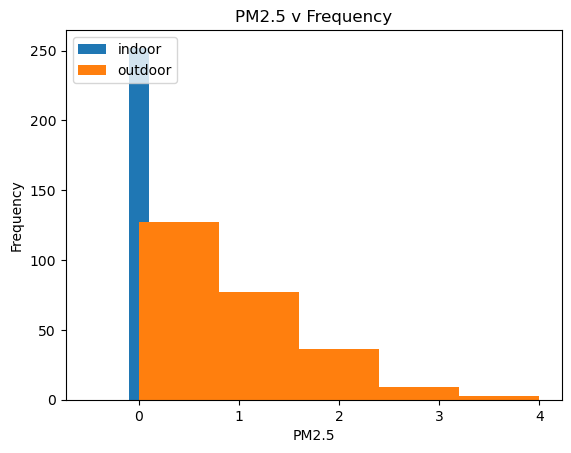

In [40]:
nbins = 5
plt.hist(data_indoor["PM 2.5"], label = "indoor", bins = nbins) 
plt.hist(data_outdoor["PM 2.5"], label = "outdoor", bins = nbins)
plt.title("PM2.5 v Frequency")
plt.ylabel("Frequency")
plt.xlabel("PM2.5")
plt.legend(loc ="upper left")
print("Indoor PM2.5 Mean: " + str(np.mean(data_indoor["PM 2.5"])))
print("Outdoor PM2.5 Mean: " + str(np.mean(data_outdoor["PM 2.5"])))




The means for both indoor and outdoor PM 2.5 are the same and the SDs although slightly different are very similar. 

The outdoors will have a higher particulate matter and a higher standard deviation for it because the air is not regulated like it is indoors and hence the PM varies based on where outside you place the sensor. Additionally it is also more exposed to particulate because the sensor would be near driving cars which would emit particulate matter.Here the outdoors have a higher PM 2.5 mean of .74 and sd of .91. 

Indoor PM10 Mean: 0.0
Outdoor PM10 Mean: 1.3650793650793651
Indoor PM10 SD: 0.0
Outdoor PM10 SD: 1.099084572934717


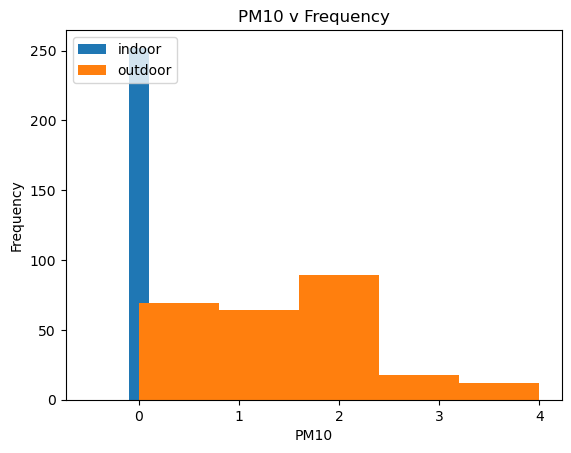

In [41]:
nbins = 5
nbins1 = 5
plt.hist(data_indoor["PM 10"], label = "indoor", bins = nbins) 
plt.hist(data_outdoor["PM 10"], label = "outdoor", bins = nbins1)
plt.title("PM10 v Frequency")
plt.ylabel("Frequency")
plt.xlabel("PM10")
plt.legend(loc ="upper left")
print("Indoor PM10 Mean: " + str(np.mean(data_indoor["PM 10"])))
print("Outdoor PM10 Mean: " + str(np.mean(data_outdoor["PM 10"])))

print("Indoor PM10 SD: " + str(np.std(data_indoor["PM 10"])))
print("Outdoor PM10 SD: " + str(np.std(data_outdoor["PM 10"])))

The outdoors will have a higher particulate matter and a higher standard deviation for it because the air is not regulated with air filters like it is indoors and hence the PM varies based on where outside you place the sensor. Additionally it is also more exposed to particulate because the sensor would be near driving cars which would emit particulate matter. As shown in the graph, the outdoor PM 10 mean and the Pm 10 SD are 1.09 and 1.36 respectively greater than the indoor PM which has a PM of 0. 

### Step 5: Comparing sensors
- Get data from another group in your lab and compare your inside data with their inside data, including all of elements from Step 4. Do the same comparing your outside data with their outside data.
- How do the sensors compare? What do you think this indicates about the accuracy and precision of your sensors?

,PM 1.0,PM 2.5,PM 10,temperature,gas,pressure,altitude,relative humidity,time
0,0,0,0,23.872578,72935,1013.088403,1.345494,19.868757,1.676509e+09
1,0,0,0,23.895430,23578,1013.095333,1.287791,20.000450,1.676509e+09
2,0,0,0,23.940352,32194,1013.097314,1.271291,20.201533,1.676509e+09
3,0,0,0,23.983711,38003,1013.093131,1.306124,20.470968,1.676509e+09
4,0,0,0,24.023555,42512,1013.088280,1.346513,20.709339,1.676509e+09
...,...,...,...,...,...,...,...,...,...
247,0,0,0,32.902656,80507,1013.277624,-0.229985,44.525052,1.676509e+09
248,0,0,0,32.926289,82571,1013.277890,-0.232201,45.243828,1.676509e+09
249,0,0,0,32.902852,88880,1013.274384,-0.203010,43.270057,1.676509e+09
250,0,0,0,32.865547,95574,1013.269096,-0.158983,39.141544,1.676509e+09


,PM 1.0,PM 2.5,PM 10,temperature,gas,pressure,altitude,relative humidity,time
0,0,0,0,23.646797,146544,997.703910,130.243320,32.743965,1.677109e+09
1,0,0,0,23.678242,18415,997.696503,130.305766,31.455664,1.677109e+09
2,0,0,0,23.728828,29374,997.692829,130.336741,30.355163,1.677109e+09
3,0,1,1,23.784492,39396,997.688806,130.370655,29.353031,1.677109e+09
4,0,1,1,23.811250,48208,997.682365,130.424957,28.578308,1.677109e+09
...,...,...,...,...,...,...,...,...,...
247,0,0,1,23.563984,201978,997.098714,135.346722,16.458317,1.677109e+09
248,0,0,1,23.570625,203224,997.100977,135.327634,16.524416,1.677109e+09
249,0,0,0,23.577852,202599,997.104215,135.300324,16.565270,1.677109e+09
250,0,0,0,23.592500,202101,997.112772,135.228148,16.591319,1.677109e+09


Indoor Pressure Mean: 1013.2035351375572
Outdoor Pressure Mean: 997.1583373644827


,Time,PM 1.0,PM 2.5,PM 10,Temperature,Gas,Humidity,Pressure,Altitude,Unnamed: 9
0,16:13:21,1,2,3,23.923555,15544,16.210994,1012.329937,7.662967,NaN
1,16:13:23,1,2,3,23.937812,5021,16.211696,1012.328199,7.677450,NaN
2,16:13:24,0,1,2,23.969453,9966,16.188729,1012.329972,7.662683,NaN
3,16:13:25,0,1,2,24.000508,14292,16.146121,1012.325614,7.698987,NaN
4,16:13:26,0,1,2,24.029414,17669,16.103419,1012.329637,7.665467,NaN
...,...,...,...,...,...,...,...,...,...,...
247,16:18:16,0,1,1,24.386250,61659,15.572760,1012.353234,7.468870,NaN
248,16:18:18,0,1,1,24.385078,61704,15.553176,1012.354694,7.456701,NaN
249,16:18:19,0,1,1,24.383516,61568,15.562865,1012.352069,7.478569,NaN
250,16:18:20,0,1,1,24.382734,61433,15.543302,1012.352472,7.475218,NaN


,Time,PM 1.0,PM 2.5,PM 10,Temperature,Gas,Humidity,Pressure,Altitude,Unnamed: 9
0,14:59:39,1,6,8,21.294648,8733,24.916397,997.310859,133.557492,NaN
1,14:59:41,1,6,7,21.310859,963,24.676618,997.308800,133.574858,NaN
2,14:59:42,0,5,6,21.346016,1465,24.438582,997.314338,133.528158,NaN
3,14:59:43,0,5,6,21.380977,1983,24.242660,997.319546,133.484234,NaN
4,14:59:44,0,4,6,21.412031,2517,24.109254,997.326789,133.423152,NaN
...,...,...,...,...,...,...,...,...,...,...
348,15:06:35,0,1,1,20.327852,69028,20.167744,996.219137,142.768355,NaN
349,15:06:36,0,1,1,20.282734,69601,20.185267,996.220798,142.754333,NaN
350,15:06:37,0,1,1,20.243281,69834,20.213192,996.226754,142.704057,NaN
351,15:06:39,0,1,1,20.190156,69834,20.235287,996.223603,142.730653,NaN


Indoor Pressure1 Mean: 1012.3290812304214
Outdoor Pressure1 Mean: 996.4291216817973
Indoor Pressure1 SD: 0.014143217020261955
Outdoor Pressure1 SD: 0.3703297192951512


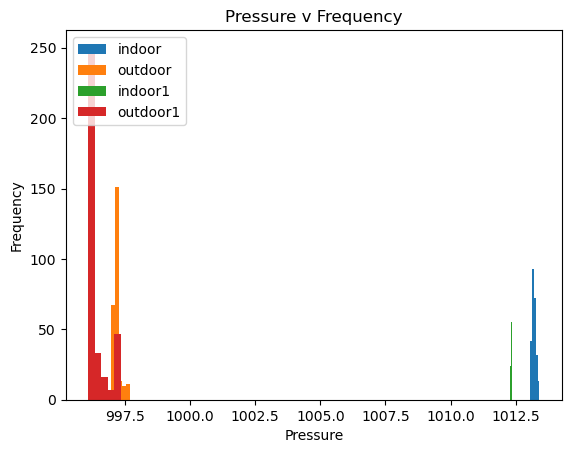

In [42]:
display(data_indoor)
display(data_outdoor)
nbins = 5
plt.hist(data_indoor["pressure"], label = "indoor", bins = nbins) 
plt.hist(data_outdoor["pressure"], label = "outdoor", bins = nbins)
plt.title("Pressure v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Pressure")
plt.legend(loc ="upper left")
print("Indoor Pressure Mean: " + str(np.mean(data_indoor["pressure"])))
print("Outdoor Pressure Mean: " + str(np.mean(data_outdoor["pressure"])))
data_indoor1 =pd.read_csv("5minTest.csv")
data_outdoor1 = pd.read_csv("OutdoorData.csv")
display(data_indoor1)
display(data_outdoor1)
nbins = 5
plt.hist(data_indoor1["Pressure"], label = "indoor1", bins = nbins) 
plt.hist(data_outdoor1["Pressure"], label = "outdoor1", bins = nbins)
plt.title("Pressure v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Pressure")
plt.legend(loc ="upper left")
print("Indoor Pressure1 Mean: " + str(np.mean(data_indoor1["Pressure"])))
print("Outdoor Pressure1 Mean: " + str(np.mean(data_outdoor1["Pressure"])))
print("Indoor Pressure1 SD: " + str(np.std(data_indoor1["Pressure"])))
print("Outdoor Pressure1 SD: " + str(np.std(data_outdoor1["Pressure"])))
#Indoor 1 and Outdoor 1 are the other persons data 


Indoor Gas Mean: 92934.59126984127
Outdoor Gas Mean: 166976.02777777778
Indoor Gas SD: 28820.89374026596
Outdoor Gas SD: 36760.82047446136
Indoor Gas1 Mean: 52015.69841269841
Outdoor Gas1 Mean: 48582.35977337111
Indoor Gas1 SD: 9560.984800400507
Outdoor Gas1 SD: 18256.60277804195


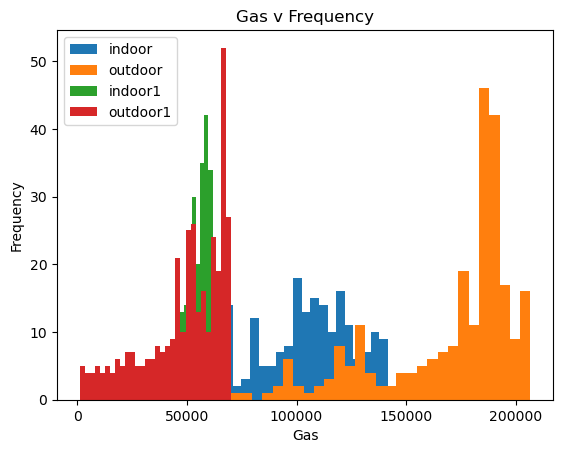

In [43]:
nbins = 30
nbins1 = 40
plt.hist(data_indoor["gas"], label = "indoor", bins = nbins) 
plt.hist(data_outdoor["gas"], label = "outdoor", bins = nbins1)
plt.title("Gas v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Gas")
plt.legend(loc ="upper left")
print("Indoor Gas Mean: " + str(np.mean(data_indoor["gas"])))
print("Outdoor Gas Mean: " + str(np.mean(data_outdoor["gas"])))

print("Indoor Gas SD: " + str(np.std(data_indoor["gas"])))
print("Outdoor Gas SD: " + str(np.std(data_outdoor["gas"]))) 

plt.hist(data_indoor1["Gas"], label = "indoor1", bins = nbins) 
plt.hist(data_outdoor1["Gas"], label = "outdoor1", bins = nbins)
plt.title("Gas v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Gas")
plt.legend(loc ="upper left")
print("Indoor Gas1 Mean: " + str(np.mean(data_indoor1["Gas"])))
print("Outdoor Gas1 Mean: " + str(np.mean(data_outdoor1["Gas"])))
print("Indoor Gas1 SD: " + str(np.std(data_indoor1["Gas"])))
print("Outdoor Gas1 SD: " + str(np.std(data_outdoor1["Gas"])))


Indoor Altitude Mean: 0.38687834611301214
Outdoor Altitude Mean: 134.843902707148
Indoor Altitude SD: 0.6360674851494406
Outdoor Altitude SD: 1.2503539243385913
Indoor Altitude1 Mean: 7.670101835344513
Outdoor Altitude1Mean: 140.99654722578384
Indoor Altitude1 SD: 0.1178386849645277
Outdoor Altitude1 SD: 3.1245810388285276


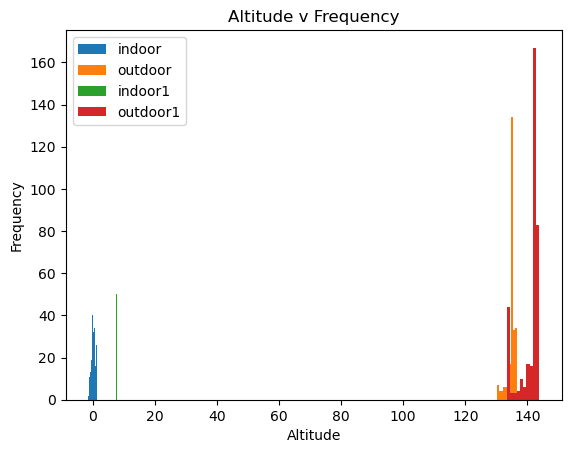

In [44]:
nbins = 10
plt.hist(data_indoor["altitude"], label = "indoor", bins = nbins) 
plt.hist(data_outdoor["altitude"], label = "outdoor", bins = nbins)
plt.title("Altitude v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Altitude")
plt.legend(loc ="upper left")
print("Indoor Altitude Mean: " + str(np.mean(data_indoor["altitude"])))
print("Outdoor Altitude Mean: " + str(np.mean(data_outdoor["altitude"])))


print("Indoor Altitude SD: " + str(np.std(data_indoor["altitude"])))
print("Outdoor Altitude SD: " + str(np.std(data_outdoor["altitude"])))

plt.hist(data_indoor1["Altitude"], label = "indoor1", bins = nbins) 
plt.hist(data_outdoor1["Altitude"], label = "outdoor1", bins = nbins)
plt.title("Altitude v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Altitude")
plt.legend(loc ="upper left")
print("Indoor Altitude1 Mean: " + str(np.mean(data_indoor1["Altitude"])))
print("Outdoor Altitude1Mean: " + str(np.mean(data_outdoor1["Altitude"])))


print("Indoor Altitude1 SD: " + str(np.std(data_indoor1["Altitude"])))
print("Outdoor Altitude1 SD: " + str(np.std(data_outdoor1["Altitude"])))


Indoor Humidity Mean: 30.51053262849725
Outdoor Humidity Mean: 20.3245934554142
Indoor Humidity SD: 17.71161136464671
Outdoor Humidity SD: 4.089225335215773
Indoor Humidity1 Mean: 15.819992493381672
Outdoor Humidity1 Mean: 23.287024026858
Indoor Humidity1 SD: 0.21229400596430759
Outdoor Humidity1 SD: 2.7837977395243185


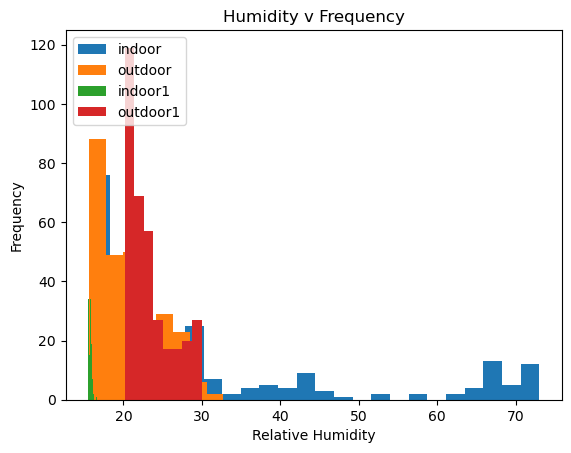

In [45]:
nbins = 8
nbins1 = 24
plt.hist(data_indoor["relative humidity"], label = "indoor", bins = nbins1) 
plt.hist(data_outdoor["relative humidity"], label = "outdoor", bins = nbins)
plt.title("Humidity v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Relative Humidity")
plt.legend(loc ="upper left")
print("Indoor Humidity Mean: " + str(np.mean(data_indoor["relative humidity"])))
print("Outdoor Humidity Mean: " + str(np.mean(data_outdoor["relative humidity"])))

print("Indoor Humidity SD: " + str(np.std(data_indoor["relative humidity"])))
print("Outdoor Humidity SD: " + str(np.std(data_outdoor["relative humidity"])))

plt.hist(data_indoor1["Humidity"], label = "indoor1", bins = nbins1) 
plt.hist(data_outdoor1["Humidity"], label = "outdoor1", bins = nbins)
plt.title("Humidity v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Relative Humidity")
plt.legend(loc ="upper left")
print("Indoor Humidity1 Mean: " + str(np.mean(data_indoor1["Humidity"])))
print("Outdoor Humidity1 Mean: " + str(np.mean(data_outdoor1["Humidity"])))

print("Indoor Humidity1 SD: " + str(np.std(data_indoor1["Humidity"])))
print("Outdoor Humidity1 SD: " + str(np.std(data_outdoor1["Humidity"])))

Indoor Temperature Mean: 27.921141958085318
Outdoor Temperature Mean: 22.988868117559523
Indoor Temperature SD: 2.0885883624810098
Outdoor Temperature SD: 1.6094695477584227
Indoor Temperature1 Mean: 24.248885633680555
Outdoor Temperature1 Mean: 19.020778262216712
Indoor Temperature1 SD: 0.08442638653189777
Outdoor Temperature1 SD: 1.963163662361133


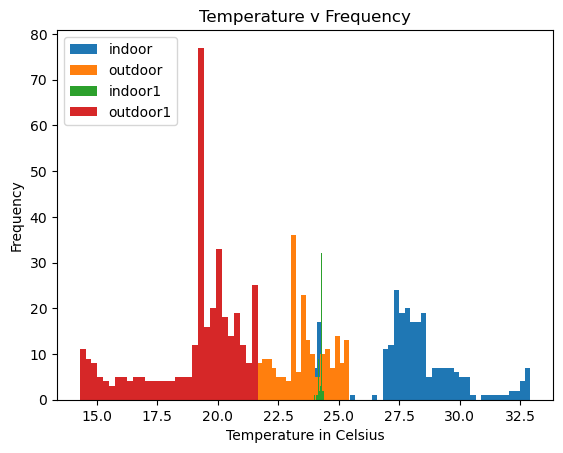

In [46]:
nbins = 30
nbins1 = 40

plt.hist(data_indoor["temperature"], label = "indoor", bins = nbins1) 
plt.hist(data_outdoor["temperature"], label = "outdoor", bins = nbins)
plt.title("Temperature v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Temperature in Celsius")
plt.legend(loc ="upper left")
print("Indoor Temperature Mean: " + str(np.mean(data_indoor["temperature"])))
print("Outdoor Temperature Mean: " + str(np.mean(data_outdoor["temperature"])))

print("Indoor Temperature SD: " + str(np.std(data_indoor["temperature"])))
print("Outdoor Temperature SD: " + str(np.std(data_outdoor["temperature"])))

plt.hist(data_indoor1["Temperature"], label = "indoor1", bins = nbins1) 
plt.hist(data_outdoor1["Temperature"], label = "outdoor1", bins = nbins)
plt.title("Temperature v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Temperature in Celsius")
plt.legend(loc ="upper left")
print("Indoor Temperature1 Mean: " + str(np.mean(data_indoor1["Temperature"])))
print("Outdoor Temperature1 Mean: " + str(np.mean(data_outdoor1["Temperature"])))

print("Indoor Temperature1 SD: " + str(np.std(data_indoor1["Temperature"])))
print("Outdoor Temperature1 SD: " + str(np.std(data_outdoor1["Temperature"])))

Indoor PM10 Mean: 0.0
Outdoor PM10 Mean: 1.3650793650793651
Indoor PM10 SD: 0.0
Outdoor PM10 SD: 1.099084572934717
Indoor PM10 1 Mean: 1.8253968253968254
Outdoor PM10 1 Mean: 2.3512747875354107
Indoor PM10 1 SD: 0.707997007878229
Outdoor PM10 1 SD: 1.8394804094136084


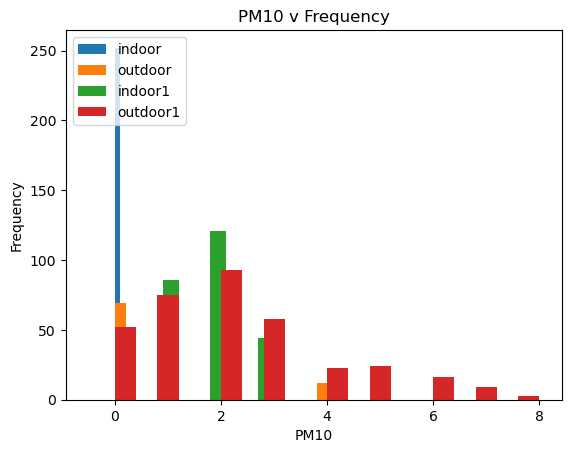

In [47]:
nbins = 10
nbins1 = 20
plt.hist(data_indoor["PM 10"], label = "indoor", bins = nbins) 
plt.hist(data_outdoor["PM 10"], label = "outdoor", bins = nbins1)
plt.title("PM10 v Frequency")
plt.ylabel("Frequency")
plt.xlabel("PM10")
plt.legend(loc ="upper left")
print("Indoor PM10 Mean: " + str(np.mean(data_indoor["PM 10"])))
print("Outdoor PM10 Mean: " + str(np.mean(data_outdoor["PM 10"])))

print("Indoor PM10 SD: " + str(np.std(data_indoor["PM 10"])))
print("Outdoor PM10 SD: " + str(np.std(data_outdoor["PM 10"])))
plt.hist(data_indoor1["PM 10"], label = "indoor1", bins = nbins) 
plt.hist(data_outdoor1["PM 10"], label = "outdoor1", bins = nbins1)
plt.title("PM10 v Frequency")
plt.ylabel("Frequency")
plt.xlabel("PM10")
plt.legend(loc ="upper left")
print("Indoor PM10 1 Mean: " + str(np.mean(data_indoor1["PM 10"])))
print("Outdoor PM10 1 Mean: " + str(np.mean(data_outdoor1["PM 10"])))

print("Indoor PM10 1 SD: " + str(np.std(data_indoor1["PM 10"])))
print("Outdoor PM10 1 SD: " + str(np.std(data_outdoor1["PM 10"])))
#Made bins smaller so I could see the data for the PM graphs.

Indoor PM2.5 1 Mean: 1.3849206349206349
Outdoor PM2.5 1 Mean: 1.9036827195467423
Indoor PM2.5 1 SD: 0.5332689634246285
Outdoor PM2.5 1 SD: 1.6376633084360483
Indoor PM2.5  Mean: 0.0
Outdoor PM2.5 Mean: 0.746031746031746
Indoor PM2.5 SD: 0.0
Outdoor PM2.5  SD: 0.9123187616188287


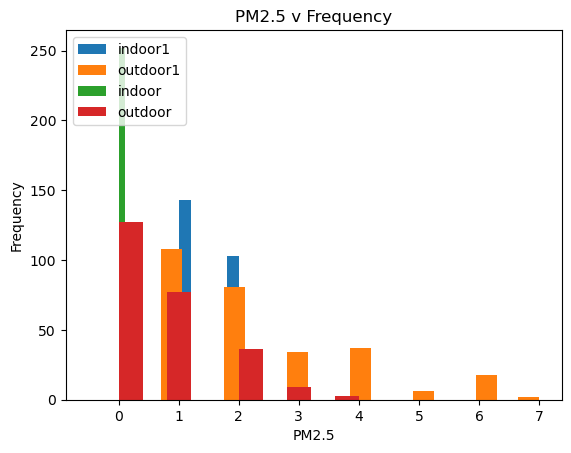

In [48]:

nbins = 10
nbins1 = 20
plt.hist(data_indoor1["PM 2.5"], label = "indoor1", bins = nbins) 
plt.hist(data_outdoor1["PM 2.5"], label = "outdoor1", bins = nbins1)
plt.title("PM2.5 v Frequency")
plt.ylabel("Frequency")
plt.xlabel("PM2.5")
plt.legend(loc ="upper left")
print("Indoor PM2.5 1 Mean: " + str(np.mean(data_indoor1["PM 2.5"])))
print("Outdoor PM2.5 1 Mean: " + str(np.mean(data_outdoor1["PM 2.5"])))

print("Indoor PM2.5 1 SD: " + str(np.std(data_indoor1["PM 2.5"])))
print("Outdoor PM2.5 1 SD: " + str(np.std(data_outdoor1["PM 2.5"])))
plt.hist(data_indoor["PM 2.5"], label = "indoor", bins = nbins) 
plt.hist(data_outdoor["PM 2.5"], label = "outdoor", bins = nbins)
plt.title("PM2.5 v Frequency")
plt.ylabel("Frequency")
plt.xlabel("PM2.5")
plt.legend(loc ="upper left")
print("Indoor PM2.5  Mean: " + str(np.mean(data_indoor["PM 2.5"])))
print("Outdoor PM2.5 Mean: " + str(np.mean(data_outdoor["PM 2.5"])))

print("Indoor PM2.5 SD: " + str(np.std(data_indoor["PM 2.5"])))
print("Outdoor PM2.5  SD: " + str(np.std(data_outdoor["PM 2.5"])))


Indoor PM1.0 Mean: 0.0
Outdoor PM1.0 Mean: 0.09126984126984126
Indoor PM1.0 SD: 0.0
Outdoor PM1.0 SD: 0.3826639790161636
Indoor PM1.0 1 Mean: 0.6111111111111112
Outdoor PM1.0 1 Mean: 0.4702549575070821
Indoor PM1.0 1 SD: 0.48749802152178456
Outdoor PM1.0 1 SD: 0.49911444824518403


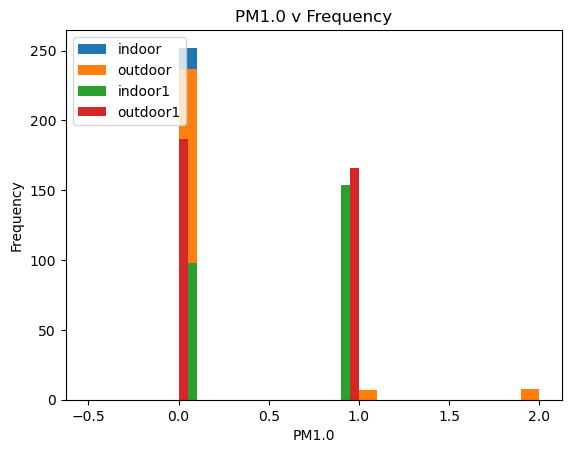

In [49]:
nbins = 10
nbins1 = 20
plt.hist(data_indoor["PM 1.0"], label = "indoor", bins = nbins) 
plt.hist(data_outdoor["PM 1.0"], label = "outdoor", bins = nbins1)
plt.title("PM1.0 v Frequency")
plt.ylabel("Frequency")
plt.xlabel("PM1.0")
plt.legend(loc ="upper left")
print("Indoor PM1.0 Mean: " + str(np.mean(data_indoor["PM 1.0"])))
print("Outdoor PM1.0 Mean: " + str(np.mean(data_outdoor["PM 1.0"])))

print("Indoor PM1.0 SD: " + str(np.std(data_indoor["PM 1.0"])))
print("Outdoor PM1.0 SD: " + str(np.std(data_outdoor["PM 1.0"])))
plt.hist(data_indoor1["PM 1.0"], label = "indoor1", bins = nbins) 
plt.hist(data_outdoor1["PM 1.0"], label = "outdoor1", bins = nbins1)
plt.title("PM1.0 v Frequency")
plt.ylabel("Frequency")
plt.xlabel("PM1.0")
plt.legend(loc ="upper left")
print("Indoor PM1.0 1 Mean: " + str(np.mean(data_indoor1["PM 1.0"])))
print("Outdoor PM1.0 1 Mean: " + str(np.mean(data_outdoor1["PM 1.0"])))

print("Indoor PM1.0 1 SD: " + str(np.std(data_indoor1["PM 1.0"])))
print("Outdoor PM1.0 1 SD: " + str(np.std(data_outdoor1["PM 1.0"])))

### Extra: Correlations in data
- Plot temperature vs humidity
  - NOTE: These were taken by the same sensor at the same time, so each measurement matches up in time, meaning plotting one versus the other works. 
  - What is the hidden variable that is important when making plots like this?
- What does this plot show? Are temperature and humidity correlated? How might you quantify this?

- Plot temperature vs another property measured by that sensor, are they correlated? Is the correlation qualitatively similar to what you see from temperature vs humidity?
  - try this for all data types (temp. vs pressure, temp. vs voc, etc.)
  
- Plot temperature vs PM2.5 concentration and discuss as with the previous comparisons.

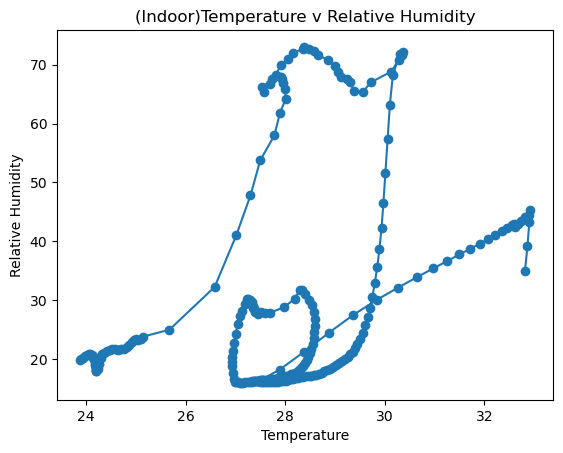

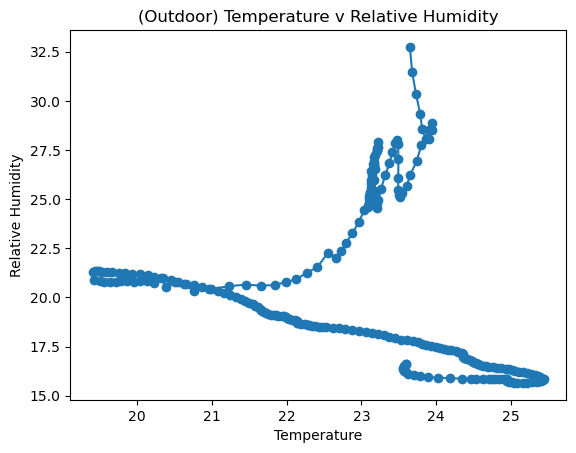

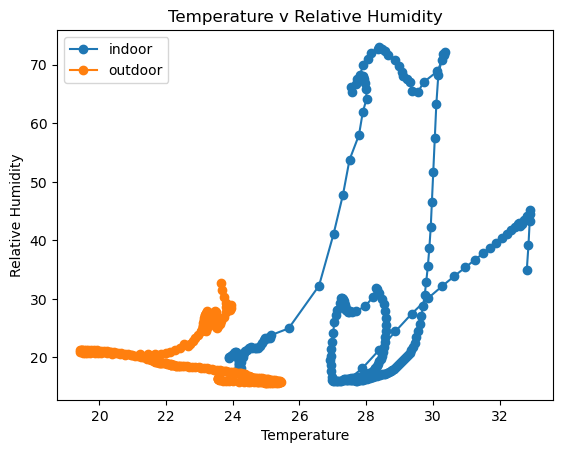

In [59]:
plt.title("(Indoor)Temperature v Relative Humidity")
plt.plot(data_indoor["temperature"],data_indoor["relative humidity"],label = "indoor", marker = "o")
plt.ylabel("Relative Humidity")
plt.xlabel("Temperature")
plt.show()
plt.plot(data_outdoor["temperature"],data_outdoor["relative humidity"],label = "outdoor",marker = "o") 
plt.title("(Outdoor) Temperature v Relative Humidity")
plt.ylabel("Relative Humidity")
plt.xlabel("Temperature")
plt.show()
plt.title("Temperature v Relative Humidity")
plt.plot(data_indoor["temperature"],data_indoor["relative humidity"],label = "indoor",marker = "o")
plt.plot(data_outdoor["temperature"],data_outdoor["relative humidity"],label = "outdoor",marker = "o") 
plt.ylabel("Relative Humidity")
plt.xlabel("Temperature")
plt.legend(loc ="upper left")
#The data shows positive correlation between temperature and relative humidity. 

The correlation between Indoor temperature and humidity is positive though the plot is nonlinear. There is a strong negative correlation between outdoor temperature and humidity. 

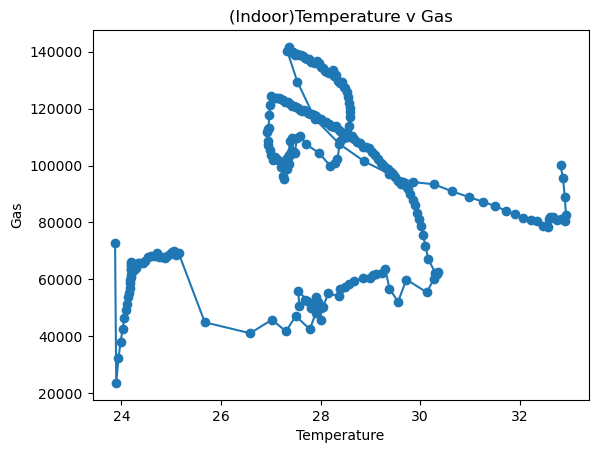

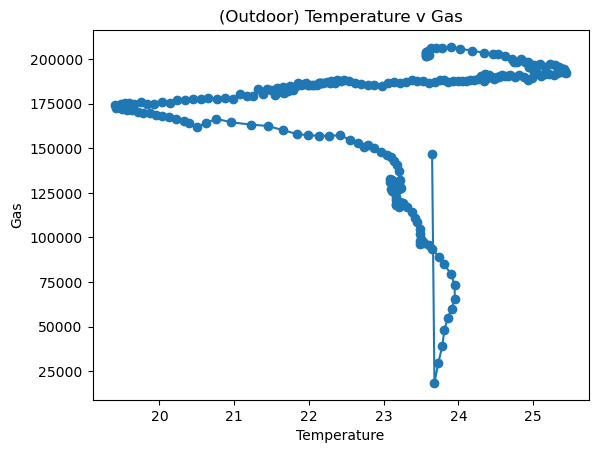

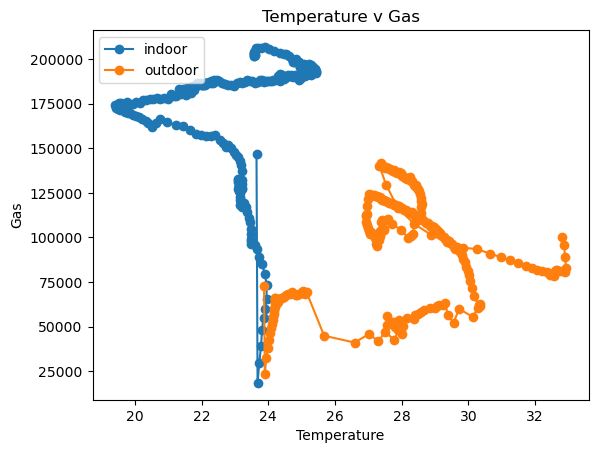

In [61]:
plt.title("(Indoor)Temperature v Gas")
plt.plot(data_indoor["temperature"],data_indoor["gas"],label = "indoor",marker = "o")
plt.ylabel("Gas")
plt.xlabel("Temperature")
plt.show()
plt.plot(data_outdoor["temperature"],data_outdoor["gas"],label = "outdoor",marker = "o") 
plt.title("(Outdoor) Temperature v Gas")
plt.ylabel("Gas")
plt.xlabel("Temperature")
plt.show()
plt.plot(data_outdoor["temperature"],data_outdoor["gas"],label = "indoor",marker = "o") #Shows no correlation
plt.plot(data_indoor["temperature"],data_indoor["gas"],label = "outdoor", marker= "o")
plt.title("Temperature v Gas")
plt.ylabel("Gas")
plt.xlabel("Temperature")
plt.legend(loc ="upper left")

The correlation between indoor temperature and gas is positive but there is not correlation between outdoor temperature and gas.  

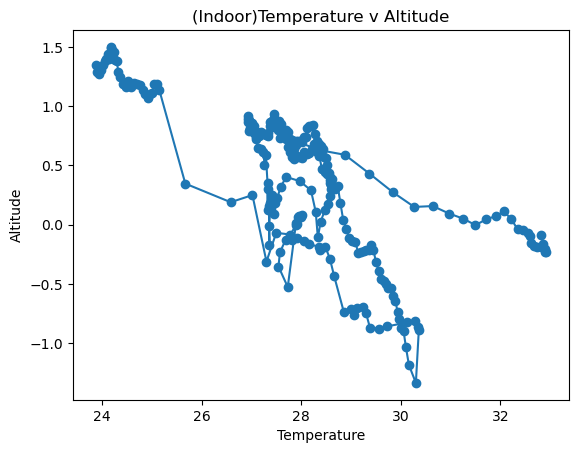

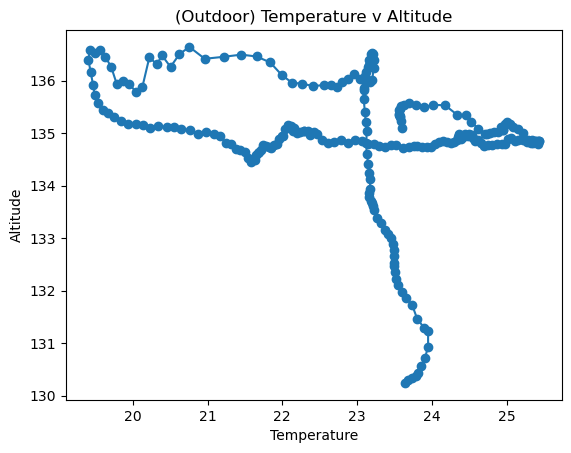

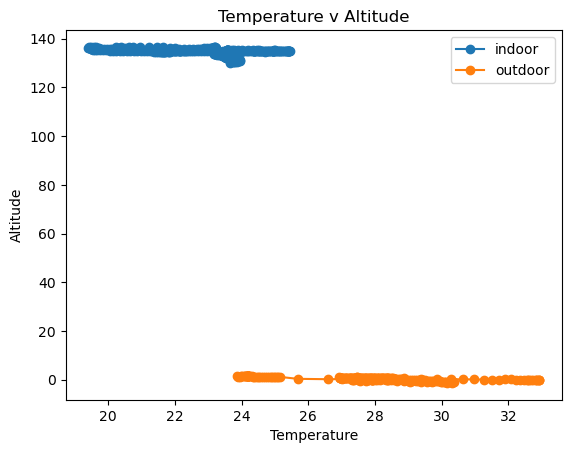

In [62]:
plt.title("(Indoor)Temperature v Altitude")
plt.plot(data_indoor["temperature"],data_indoor["altitude"],label = "indoor",marker = "o")
plt.ylabel("Altitude")
plt.xlabel("Temperature")
plt.show()
plt.plot(data_outdoor["temperature"],data_outdoor["altitude"],label = "outdoor",marker = "o") 
plt.title("(Outdoor) Temperature v Altitude")
plt.ylabel("Altitude")
plt.xlabel("Temperature")
plt.show()
plt.plot(data_outdoor["temperature"],data_outdoor["altitude"],label = "indoor",marker = "o") #This graph shows a negative correlation between temperature and altitude. 
plt.plot(data_indoor["temperature"],data_indoor["altitude"],label = "outdoor", marker = "o")
plt.title("Temperature v Altitude")
plt.ylabel("Altitude")
plt.xlabel("Temperature")
plt.legend(loc ="upper right")

There is a moderately positive correlation between indoor temperature and altitude and a moderately negative correlation between outdoor temperature and altitude. 

No handles with labels found to put in legend.


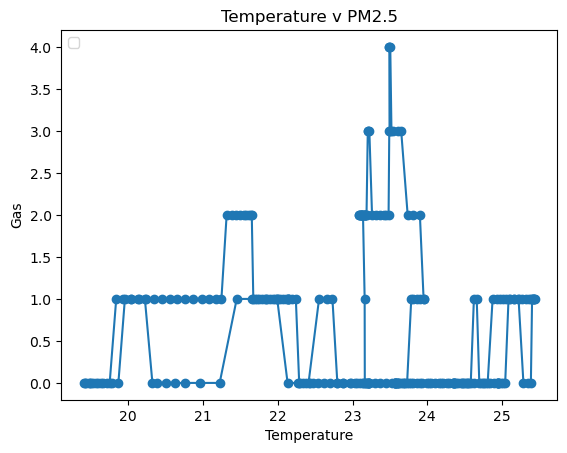

In [63]:
plt.plot(data_outdoor["temperature"],data_outdoor["PM 2.5"],marker = "o")
plt.title("Temperature v PM2.5")
plt.ylabel("Gas")
plt.xlabel("Temperature")
plt.legend(loc ="upper left")
#This shows no correlation

No handles with labels found to put in legend.


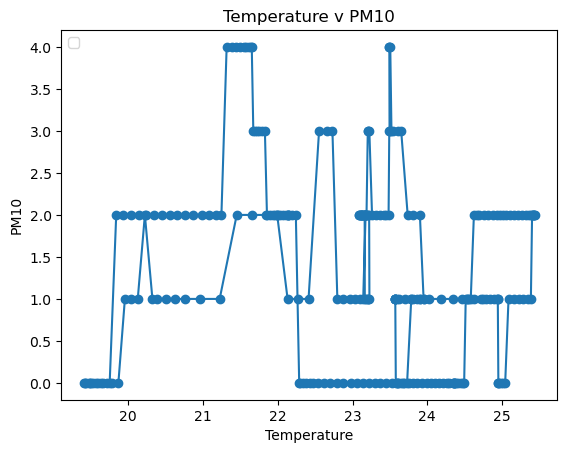

In [64]:
plt.plot(data_outdoor["temperature"],data_outdoor["PM 10"],marker = "o")
plt.title("Temperature v PM10")
plt.ylabel("PM10")
plt.xlabel("Temperature")
plt.legend(loc ="upper left")

No handles with labels found to put in legend.


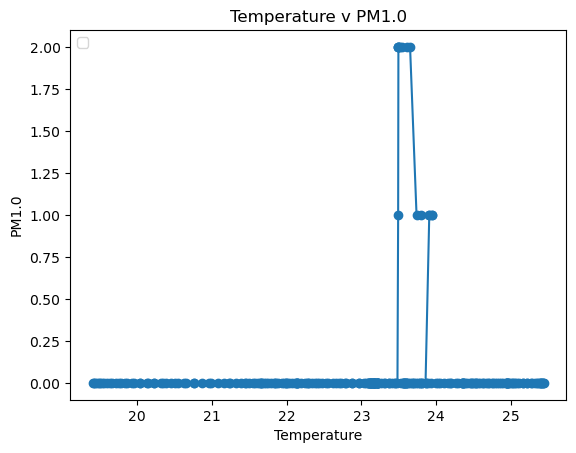

In [65]:
plt.plot(data_outdoor["temperature"],data_outdoor["PM 1.0"],marker= "o")
plt.title("Temperature v PM1.0")
plt.ylabel("PM1.0")
plt.xlabel("Temperature")
plt.legend(loc ="upper left")

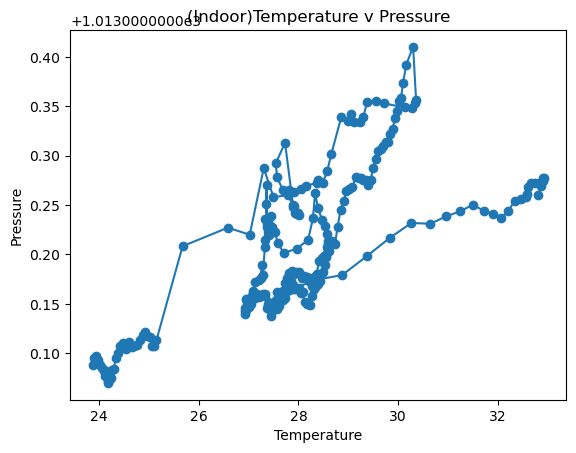

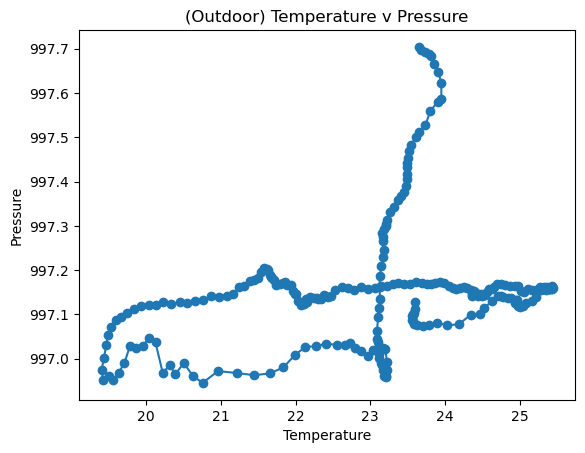

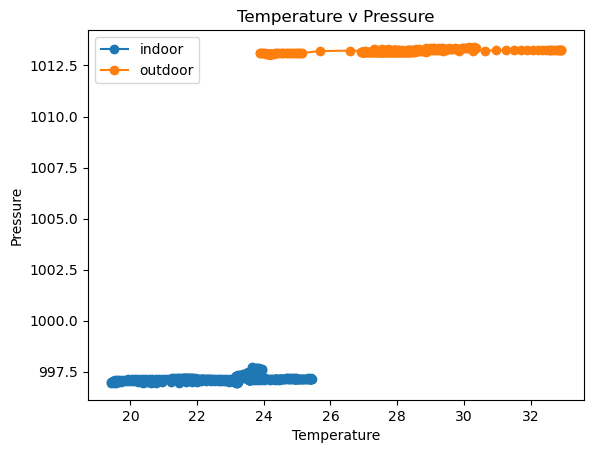

In [66]:
plt.title("(Indoor)Temperature v Pressure")
plt.plot(data_indoor["temperature"],data_indoor["pressure"],label = "indoor",marker = "o")
plt.ylabel("Pressure")
plt.xlabel("Temperature")
plt.show()
plt.plot(data_outdoor["temperature"],data_outdoor["pressure"],label = "outdoor",marker = "o") 
plt.title("(Outdoor) Temperature v Pressure")
plt.ylabel("Pressure")
plt.xlabel("Temperature")
plt.show()
plt.plot(data_outdoor["temperature"],data_outdoor["pressure"],label = "indoor",marker = "o") #Shows no correlation
plt.plot(data_indoor["temperature"],data_indoor["pressure"],label = "outdoor",marker = "o")
plt.title("Temperature v Pressure")
plt.ylabel("Pressure")
plt.xlabel("Temperature")
plt.legend(loc ="upper left")

There is a positive correlation between indoor temperature and pressure but no correlation between outdoor temperature and pressure. 